# Position of a quasar

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import scipy

## Part 1

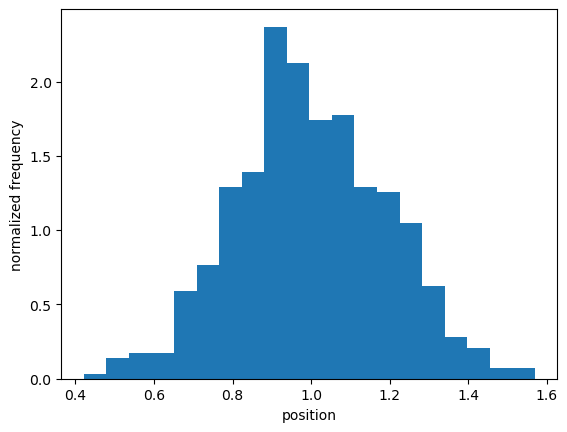

In [35]:
mean = 1
Sigma = 0.2   # homoscedastic errors
norm = 1/(np.sqrt(2*np.pi)*Sigma)
N = 500
data = []
for i in range(N):
    data.append(random.gauss(mean,Sigma))
plt.hist(data,20,density=True)
plt.xlabel('position')
plt.ylabel('normalized frequency')
plt.show()

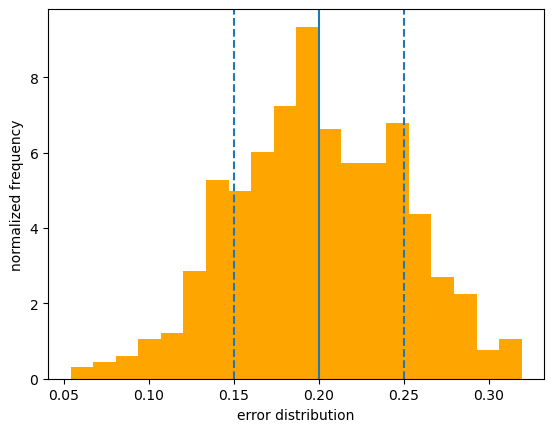

In [38]:
ds = np.zeros(N)
sigma = Sigma
sigma_err = 0.05      # error on the uncertainty   [ set it =0 for homoscedastic problem, !=0 for eteroscedastic ]
for i in range(N):
    ds[i] = random.gauss(sigma,sigma_err)     # standard deviations around 0.2 with deviation sigma_err

normalization = 1 / (ds*np.sqrt(2*np.pi))
plt.hist(ds,20,color='orange',density=True)
plt.axvline(sigma)
plt.axvline(sigma+sigma_err,linestyle='--')
plt.axvline(sigma-sigma_err,linestyle='--')
plt.xlabel('error distribution')
plt.ylabel('normalized frequency')  
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 514.08it/s]


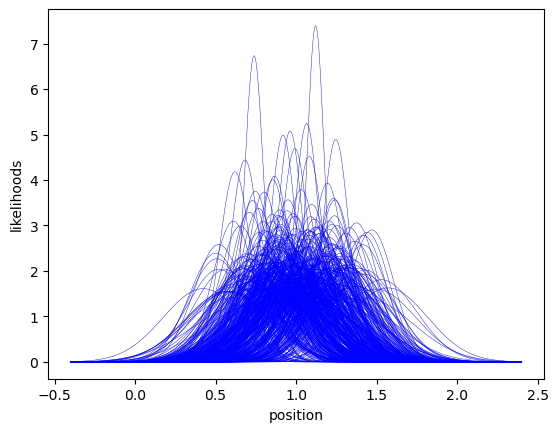

In [45]:
x = np.linspace(mean-7*sigma,mean+7*sigma,1000)
likelihoods = np.zeros((N,len(x)))

for i in tqdm(range(N)):
    likelihoods[i] = scipy.stats.norm(data[i],ds[i]).pdf(x)

for i in range(N):
    plt.plot(x,likelihoods[i], color='b',linewidth=0.3)       #plot all the likelihoods for each measurement
plt.xlabel('position')
plt.ylabel('likelihoods')
plt.show()

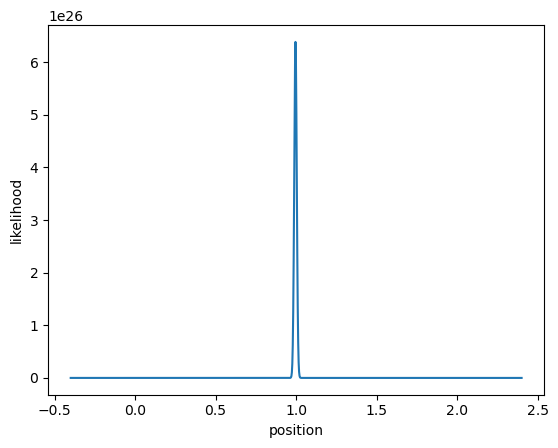

In [46]:
L = np.ones(len(x))           
for j in range(len(x)):
    for i in range(N):
        L[j] = L[j]*likelihoods[i][j]      # likelihood as product of single likelihoods
plt.plot(x,L)
plt.xlabel('position')
plt.ylabel('likelihood')
plt.show()

In [47]:
a = np.argsort(L)
MLEe = x[a[-1]]       # maximum of the likelihood 
MLEe

0.9957957957957959

In [48]:
MLEt = np.mean(data)    # MLE derived from the measurements
print(MLEt)

0.9971390262310486


 Theoretical MLE: 0.9971390262310486 
Experimental MLE: 0.9957957957957959


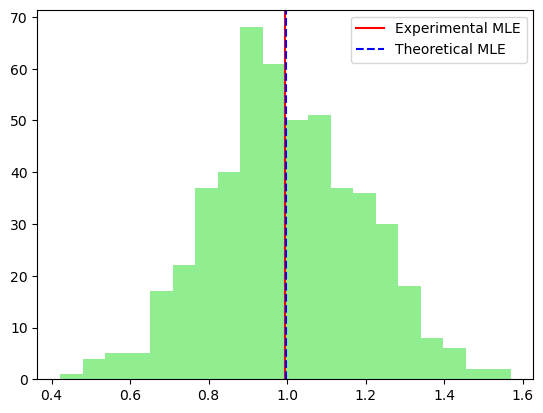

In [49]:
# comparison between the 2 MLEs
print(" Theoretical MLE:",MLEt,"\nExperimental MLE:",MLEe)
plt.hist(data,20,color='lightgreen',)
plt.axvline(MLEe,color='r',label='Experimental MLE')
plt.axvline(MLEt,color='b',ls='dashed',label='Theoretical MLE')
plt.legend()
plt.show()

## Part 2

In [50]:
F_err_t = np.sum(1/ds**2)**(-1/2)        # theoretical Fisher matrix error (for gaussian distrib)

lnL = np.log(L)           # log of the likelihood
diff2_L = - np.diff(lnL,n=2)/((x[5]-x[4])**2)    # 2nd order differentiation of logL 
Fisher = diff2_L[a[-1]]        # Fisher matrix (second derivative of logL evaluated in the maximum)
F_err_e = Fisher**(-1/2)     # uncertainty 

print(" Theoretical Fisher matrix error:", F_err_t,"\nExperimental Fisher matrix error:",F_err_e)
print(" Theoretical Fisher matrix error with fixed sigma (for comparison when heteroscedastic):", sigma/np.sqrt(N))

 Theoretical Fisher matrix error: 0.007868580663187016 
Experimental Fisher matrix error: 0.007868580663187357
 Theoretical Fisher matrix error with fixed sigma (for comparison when heteroscedastic): 0.00894427190999916


/tmp/ipykernel_502/757259799.py:3: RuntimeWarning: divide by zero encountered in log
  lnL = np.log(L)           # log of the likelihood
/home/sandokan/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


μ = 0.9957957957957959 ± 0.007868580663187357


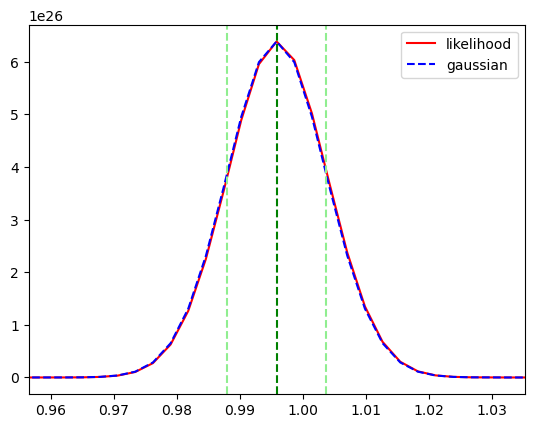

In [51]:
print('μ =',MLEe,'±',F_err_e)

gaussL = scipy.stats.norm(MLEe,F_err_e).pdf(x)     # N(μ,σ_μ)

# plot
plt.plot(x,L, color='r',label='likelihood')                                         # likelihood
plt.plot(x,gaussL*max(L)/max(gaussL), color='b',linestyle='--',label='gaussian')    # normalized gaussian

plt.xlim(MLEe-5*F_err_e, MLEe+5*F_err_e)
plt.axvline(MLEe, color='g',linestyle='--')
plt.axvline(MLEe+F_err_e, color='lightgreen',linestyle='--')
plt.axvline(MLEe-F_err_e, color='lightgreen',linestyle='--')
plt.legend()
plt.show()

## Part 3

For the eteroscedastic case, run again the code by changing the uncertainty of the standard deviation (parameter sigma_err) in the second cell in part 2.